In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [13]:
# Load dataset
file_path = r"C:\Users\Shree\Desktop\TaNaYa\3rd_Sem\Project\Final Project\Final\energy_consumption.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y %H:%M')
data.set_index('Date', inplace=True)

# Display the dataset info
print(data.info())


               Date  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand  \
0  02-01-2019 00:00   119.9    130.3      234.1   85.8  313.9         40.7   
1  03-01-2019 00:00   121.9    133.5      240.2   85.5  311.8         39.3   
2  04-01-2019 00:00   118.8    128.2      239.8   83.5  320.7         38.1   
3  05-01-2019 00:00   121.0    127.5      239.1   79.2  299.0         39.2   
4  06-01-2019 00:00   121.4    132.6      240.4   76.6  286.8         39.2   

     HP   J&K  Chandigarh  ...  Odisha  West Bengal  Sikkim  \
0  30.0  52.5         5.0  ...    70.2        108.2     2.0   
1  30.1  54.1         4.9  ...    67.9        110.2     1.9   
2  30.1  53.2         4.8  ...    66.3        106.8     1.7   
3  30.2  51.5         4.3  ...    65.8        107.0     2.0   
4  31.0  53.2         4.3  ...    62.9        106.4     2.0   

   Arunachal Pradesh  Assam  Manipur  Meghalaya  Mizoram  Nagaland  Tripura  
0                2.1   21.7      2.7        6.1      1.9       2.2      3.

In [15]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values if necessary
# For simplicity, we will drop missing values
data.dropna(inplace=True)

# Resample the data if necessary (e.g., daily)
data = data.resample('D').mean()  # Adjust according to your needs


Punjab               206
Haryana              206
Rajasthan            206
Delhi                206
UP                   206
Uttarakhand          206
HP                   206
J&K                  206
Chandigarh           206
Chhattisgarh         206
Gujarat              206
MP                   206
Maharashtra          206
Goa                  206
DNH                  206
Andhra Pradesh       206
Telangana            206
Karnataka            206
Kerala               206
Tamil Nadu           206
Pondy                206
Bihar                206
Jharkhand            206
Odisha               206
West Bengal          206
Sikkim               206
Arunachal Pradesh    206
Assam                206
Manipur              206
Meghalaya            206
Mizoram              206
Nagaland             206
Tripura              206
dtype: int64


c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

ARIMA RMSE: 65.81276070434696


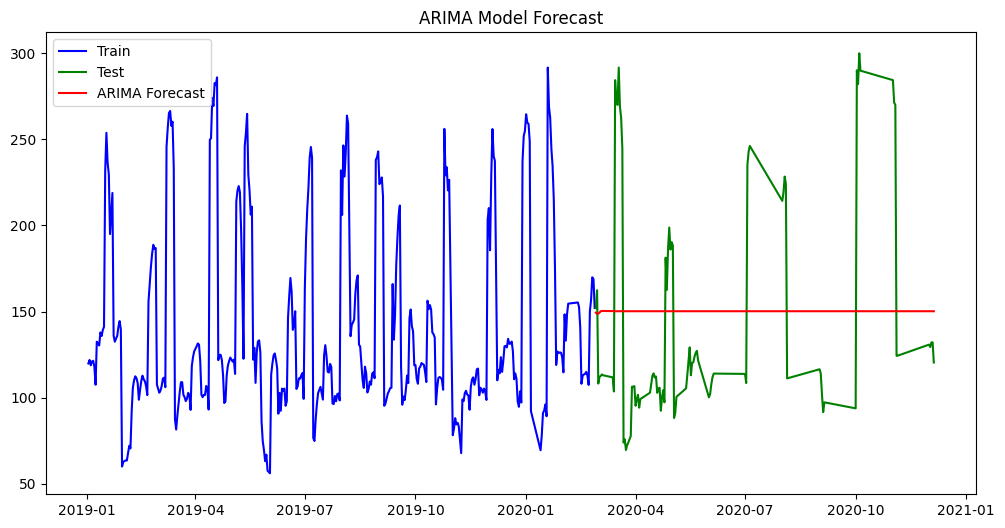

In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Select a state for prediction (e.g., Punjab)
y = data['Punjab']

# Ensure no NaN values in the series (fill or drop NaN)
y = y.dropna()  # You can also use y.fillna(method='ffill') or y.fillna(0)

# Split data into training and testing sets (80/20 split)
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Fit ARIMA model (adjust order based on analysis)
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) values can be tuned
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Ensure no NaN values in forecast
forecast = np.nan_to_num(forecast)

# Calculate RMSE
arima_rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'ARIMA RMSE: {arima_rmse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


C:\Users\Shree\AppData\Local\Temp\ipykernel_19568\1341697644.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Mean Absolute Error (MAE): 6.801138613861379
Root Mean Squared Error (RMSE): 9.558700465238893


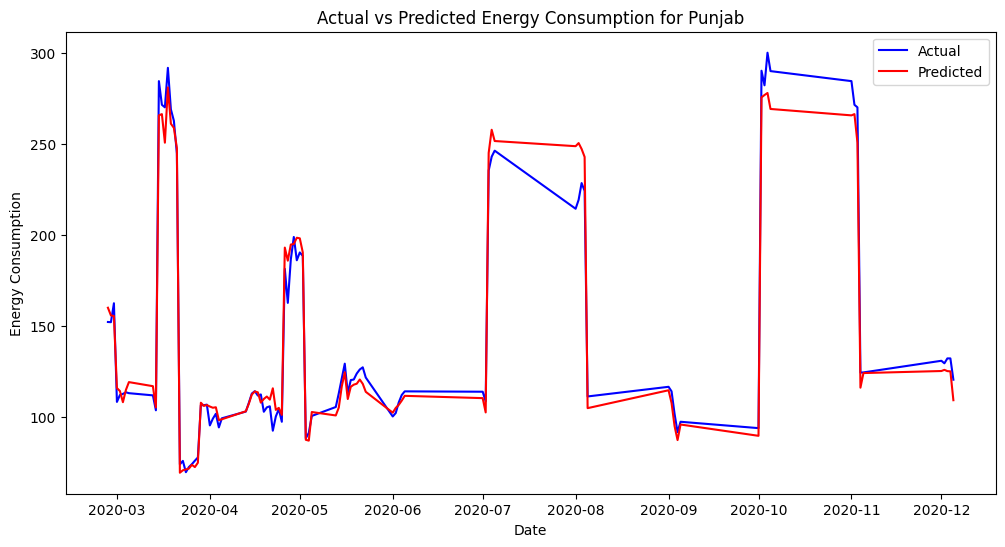

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('C:/Users/Shree/Desktop/dataset_tk.csv', parse_dates=['Date'], dayfirst=True)
data.set_index('Date', inplace=True)

# Handle missing values if any
data = data.fillna(method='ffill')

# Select the state for target variable (for example, Punjab)
target_state = 'Punjab'

# Features (all other states) and target (energy consumption of target_state)
X = data.drop(columns=[target_state])  # Drop the target state for features
y = data[target_state]  # Target is the energy consumption of the target state

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Random Forest Regressor for Time Series Analysis
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction on the test set
y_pred = rf_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title(f'Actual vs Predicted Energy Consumption for {target_state}')
plt.legend()
plt.show()


RMSE: 13.432664620319388
MAPE: 4.31%
R-squared: 0.9482642918032408


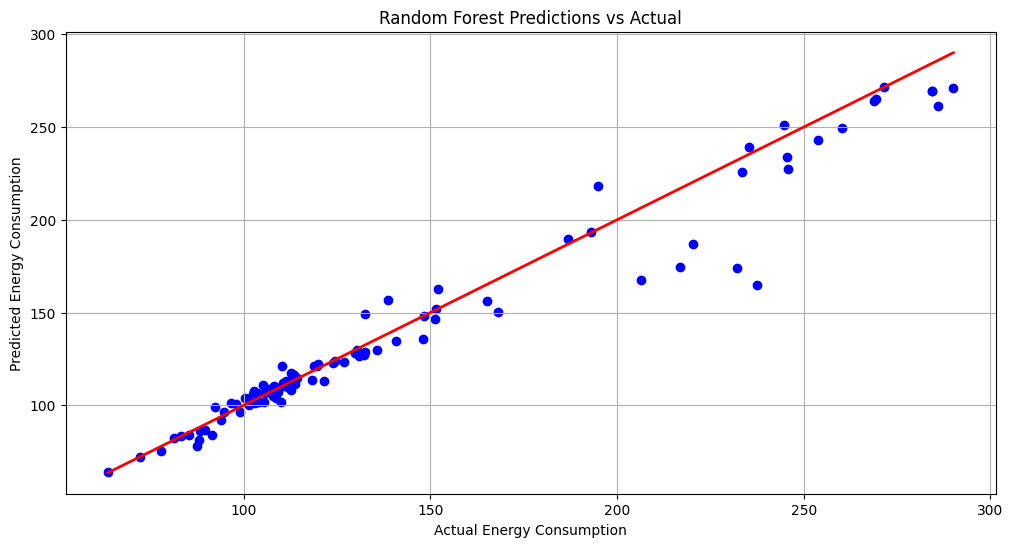

In [ ]:
features = df.drop(columns=['Punjab'])  # Replace 'Punjab' with the actual column name for the target
target = df['Punjab']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate model accuracy metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print accuracy metrics
print(f'RMSE: {rmse}')
print(f'MAPE: {mape * 100:.2f}%')
print(f'R-squared: {r_squared}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.grid()
plt.show()



C:\Users\Shree\AppData\Local\Temp\ipykernel_19568\773542729.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Mean Absolute Error (MAE): 6.801138613861379
Root Mean Squared Error (RMSE): 9.558700465238893


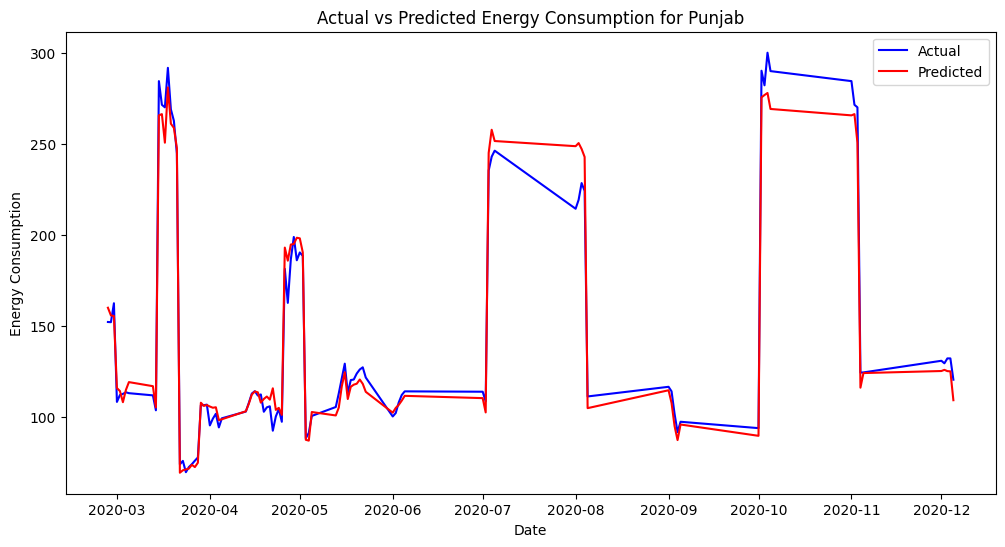

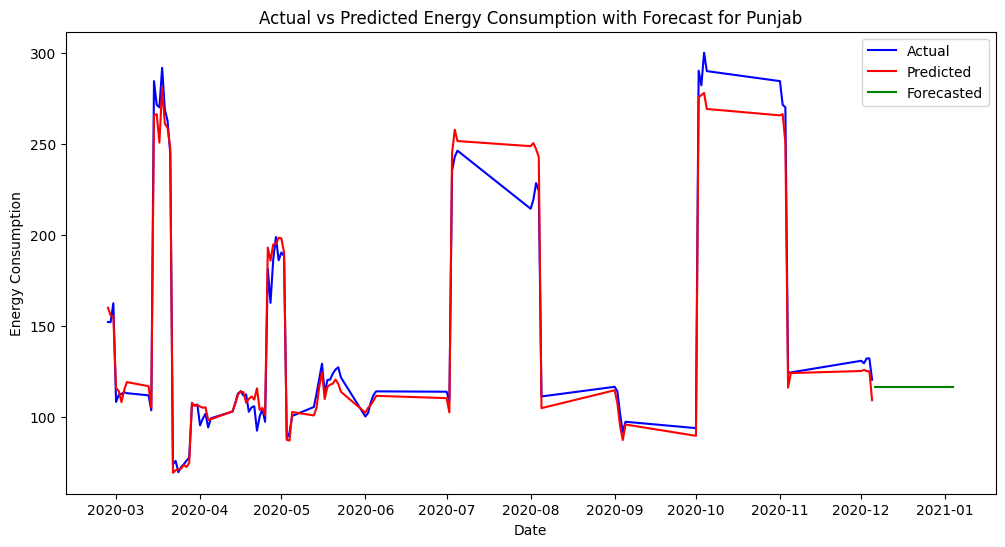

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('C:/Users/Shree/Desktop/dataset_tk.csv', parse_dates=['Date'], dayfirst=True)
data.set_index('Date', inplace=True)

# Handle missing values if any
data = data.fillna(method='ffill')

# Select the state for target variable (for example, Punjab)
target_state = 'Punjab'

# Features (all other states) and target (energy consumption of target_state)
X = data.drop(columns=[target_state])  # Drop the target state for features
y = data[target_state]  # Target is the energy consumption of the target state

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Random Forest Regressor for Time Series Analysis
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction on the test set
y_pred = rf_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title(f'Actual vs Predicted Energy Consumption for {target_state}')
plt.legend()
plt.show()

# ---------- Future Forecasting ---------- #

# Retrain the model on the full dataset
rf_model.fit(X, y)

# Forecasting the next N days (for example, 30 days)
n_days = 30
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=n_days + 1, freq='D')[1:]  # Skip the first value (it's the last_date itself)

# Predict future values
X_future = X.iloc[-n_days:].copy()  # Get the last N days of features as input for future predictions

# ---------- Future Forecasting ---------- #

# Retrain the model on the full dataset
rf_model.fit(X, y)

# Forecasting the next N days (for example, 30 days)
n_days = 30
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=n_days + 1, freq='D')[1:]  # Skip the first value (it's the last_date itself)

# Prepare the last available features as input for future predictions
X_future = X.iloc[-1:].copy()  # Get the last row of features

# Future Predictions - Extend the model
future_preds = []
for i in range(n_days):
    pred = rf_model.predict(X_future)[0]  # Predict based on the latest available data
    future_preds.append(pred)

    # Update the feature set with the predicted value for the next prediction
    new_row = X_future.iloc[-1].copy()  # Copy the last row
    new_row[target_state] = pred  # Insert the predicted value

    # Prepare the new row for future predictions by dropping the target variable
    new_row = new_row.drop(target_state)  # Ensure the target state is not included in features

    # Instead of append, use pd.concat
    X_future = pd.concat([X_future, new_row.to_frame().T])  # Append to future data as a DataFrame

# Convert future predictions to a DataFrame
forecast_df = pd.DataFrame({'Date': future_dates, f'Forecasted_{target_state}': future_preds})
forecast_df.set_index('Date', inplace=True)

# Plot the actual, predicted, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual', color='blue')  # Actual recent data
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted', color='red')  # Predicted on test set
plt.plot(forecast_df.index, forecast_df[f'Forecasted_{target_state}'], label='Forecasted', color='green')  # Forecasted future data
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title(f'Actual vs Predicted Energy Consumption with Forecast for {target_state}')
plt.legend()
plt.show()
